# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy

# Import API key
import api_keys

# Output File (CSV)
output_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#  Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=punta%20arenas
Processing Record 2 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=hobart
Processing Record 3 | Thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=thompson
City not found. Skipping...
Processing Record 4 | Cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=cabedelo
Processing Record 5 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=vaini
Processing Record 6 | Martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=martapura
Processing Record 7 | Jamestown
http://api.openweatherm

Processing Record 57 | Bata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=bata
Processing Record 58 | Torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=torbay
Processing Record 59 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=hithadhoo
Processing Record 60 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=cape%20town
Processing Record 61 | Chicama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=chicama
Processing Record 62 | Yendi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=yendi
Processing Record 63 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=fort%20nelso

Processing Record 114 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=chuy
Processing Record 115 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=port%20elizabeth
Processing Record 116 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=vestmannaeyjar
Processing Record 117 | Afikpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=afikpo
Processing Record 118 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=qaanaaq
Processing Record 119 | Sakaiminato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=sakaiminato
Processing Record 120 | Tecpan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464

City not found. Skipping...
Processing Record 169 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=henties%20bay
City not found. Skipping...
Processing Record 170 | Kaputa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=kaputa
Processing Record 171 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=tasiilaq
Processing Record 172 | Mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=mercedes
Processing Record 173 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=maniitsoq
Processing Record 174 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=pevek
City not found. Skipping...
Processing Record 175 | Padang
http://api.open

Processing Record 223 | Alberton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=alberton
Processing Record 224 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=flin%20flon
Processing Record 225 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=talcahuano
City not found. Skipping...
Processing Record 226 | Sao Manuel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=sao%20manuel
City not found. Skipping...
Processing Record 227 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=haines%20junction
Processing Record 228 | Ranong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=ranong
Processing Record 229 | Flinders
http://api.open

Processing Record 278 | Aitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=aitape
Processing Record 279 | Green Valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=green%20valley
Processing Record 280 | High Level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=high%20level
Processing Record 281 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=auki
Processing Record 282 | Hervey Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=hervey%20bay
Processing Record 283 | Barranco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=barranco
Processing Record 284 | Lazaro Cardenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a846

Processing Record 333 | Odder
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=odder
Processing Record 334 | Batagay-Alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=batagay-alyta
Processing Record 335 | Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=gat
Processing Record 336 | Freeport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=freeport
Processing Record 337 | Powell River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=powell%20river
Processing Record 338 | Olinda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=olinda
Processing Record 339 | Ponta do Sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d

Processing Record 389 | Mbengwi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=mbengwi
Processing Record 390 | Barisal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=barisal
Processing Record 391 | Lunenburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=lunenburg
Processing Record 392 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=sola
City not found. Skipping...
Processing Record 393 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=saint-augustin
Processing Record 394 | Mendoza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=mendoza
Processing Record 395 | Baracoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=16

Processing Record 444 | Road Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=road%20town
Processing Record 445 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=nuuk
Processing Record 446 | Nanakuli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=nanakuli
Processing Record 447 | Beled
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=beled
Processing Record 448 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=port%20lincoln
Processing Record 449 | Kamen-na-Obi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=kamen-na-obi
Processing Record 450 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7

Processing Record 500 | Olden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=olden
Processing Record 501 | Igarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=igarka
Processing Record 502 | Salamiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=salamiyah
Processing Record 503 | Ugoofaaru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=ugoofaaru
Processing Record 504 | Roald
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=roald
Processing Record 505 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=grindavik
Processing Record 506 | Rongcheng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=ron

Processing Record 556 | Fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=fare
Processing Record 557 | Vancouver
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=vancouver
Processing Record 558 | Mozarlandia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=mozarlandia
Processing Record 559 | Gobabis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=gobabis
Processing Record 560 | Cap Malheureux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=cap%20malheureux
Processing Record 561 | Betsiamites
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a8464537c7b75fa0d17af023&q=betsiamites
Processing Record 562 | Tigre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=164c7f67a84645

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [10]:
# Save data frame to CSV
weather_data.to_csv('weather_outputs/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,20,CL,1561233250,78,-53.16,-70.91,41.00,13.87
1,Hobart,20,AU,1561233033,86,-42.88,147.33,37.99,10.29
2,Thompson,90,CA,1561233249,77,55.74,-97.86,60.80,10.29
3,Cabedelo,75,BR,1561233285,65,-6.97,-34.84,82.40,16.11
4,Vaini,100,IN,1561233242,93,15.34,74.49,76.77,1.54


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

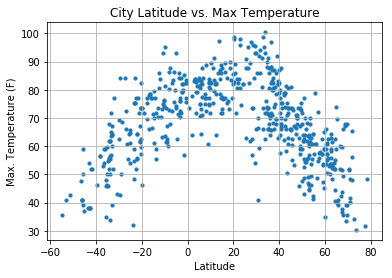

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_outputs/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

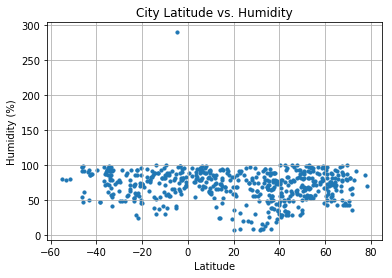

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_outputs/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

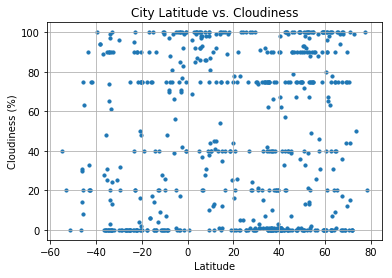

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_outputs/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

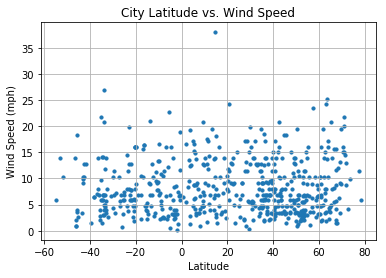

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_outputs/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()